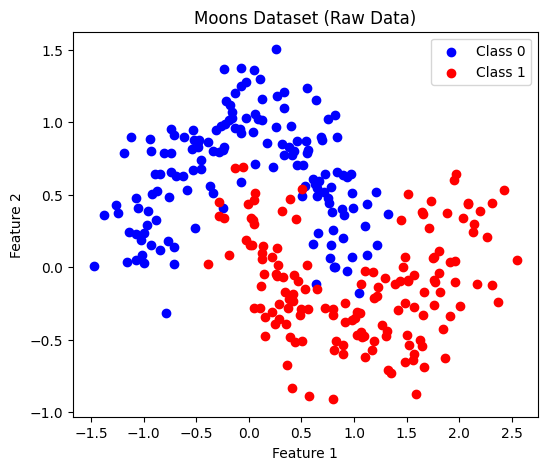

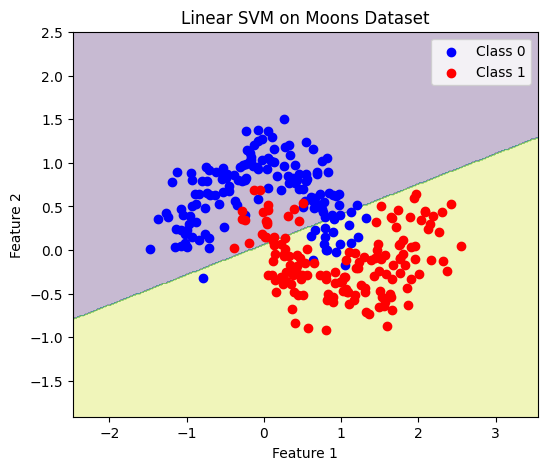

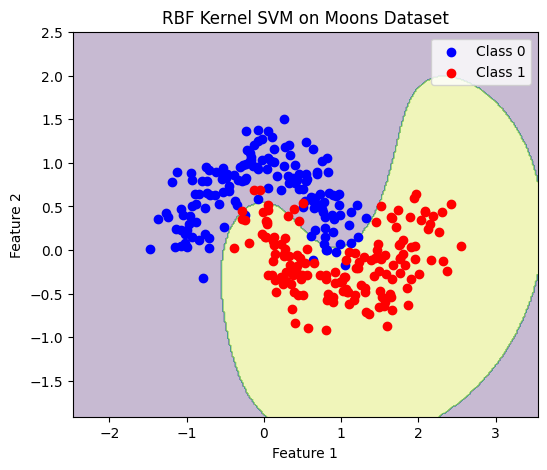

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC

# ---------- Helper Functions ----------

def plot_moons_dataset(X, y):
    plt.figure(figsize=(6, 5))
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color="blue", label="Class 0")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color="red", label="Class 1")
    plt.title("Moons Dataset (Raw Data)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()


def plot_svm_decision_boundary(model, X, y, title):
    plt.figure(figsize=(6, 5))

    # Mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Decision regions
    plt.contourf(xx, yy, Z, alpha=0.3)

    # Data points
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color="blue", label="Class 0")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color="red", label="Class 1")

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()


X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

plot_moons_dataset(X, y)

linear_svm = SVC(kernel="linear")
linear_svm.fit(X, y)

plot_svm_decision_boundary(
    linear_svm, X, y, "Linear SVM on Moons Dataset"
)

rbf_svm = SVC(kernel="rbf", gamma="scale")
rbf_svm.fit(X, y)

plot_svm_decision_boundary(
    rbf_svm, X, y, "RBF Kernel SVM on Moons Dataset"
)
